## Module 1: Exploratory Data Analysis - Stock Market Data

1. Choose one of the following articles. Describe your take-aways from the article. Present in your video presentation for 1 minute. 
    - [Information networks- Evidence from illegal insider trading]()
    - [Informed Options Trading prior to M&A Announcements]()
    - ["Stock Market Anomalies” and “Stock Market Anomaly Detection” Are Two Different Things](https://medium.com/anomaly-detection-with-python-and-r/stock-market-anomalies-and-stock-market-anomaly-detection-are-two-different-things-624331c7b65a)

2. Create new features and conduct exploratory data analysis. Your exploratory data analysis should be as exhaustive as possible. 
3. Each feature or discussion is a new lead. Structure your EDA for different leads with sub-sections. Each sub-section will cover the following:
    - Lead: Write what you are going to do in two to three sentences.
    - Analysis: your EDA
    - Conclusion: What is the business insight? How can this feature help prediction? Write a short conclusion in the end of each sub-section. 

# Part 1: Take-aways 

I choose the first article, Information networks- Evidence from illegal insider trading. Here are what I learned from the paper:

    - Though challenges exist to find out anomalies, data mining is a great technique to solve problems.
Three challenges have mentioned in this article. The first one is the spread out of important information about insider trading. The information is spread out among different types of option contract and across multiple trading days. The second one is much important information buried in unstructured text. For example, we need to estimate the influence of related news. Finally, relational interactions among companies also cause abnormal trading. 

To solve these problems, we can use combinations of different techniques. For example, we can use text mining to check if the news will have a great impact on the current market. And data mining techniques such as machine learning will help us identify unusual values and patterns. 

    - To examine insider trading, several symptoms can be applied, including abnormally-high trading volumes and increase implied volatility.
When a jump in the volume of options traded occurred, the market may have insider trading, especially for those have neat-term expiration since the investors will earn more profits. And an imbalance between volumes of calls and puts also indicate insider trading. The second symptom is the increase of implied volatility which also can be an indicator of uncertainty. 

Based on these two symptoms, we can analyze the volume data and price data to examine whether anomalies exist in the financial market.


# Part 2: Exploratory Data Analysis


## 1. Pick the stock

To choose the stock, I filtered the stocks by market cap. Usually, the large cap and medium cap may have relatively stable prices comapred to small market cap. Besides, the small cap also has the great possibility to generate higher returns and might need to be investigated further. Besides, I choose the healthcare sector since it is pretty sensitive and is likely to have insider trading or anomalies. The specific stock I picked is "INGN", which has great price movements in the past 52 weeks. And its company name is Inogen, Inc.

data sources: https://finance.yahoo.com/quote/INGN?p=INGN

In [ ]:
# load libraries
library(quantmod)
library(TTR)
library(tidyverse)
library(dplyr)

In [86]:
# get the stock
getSymbols('INGN', scr = 'yahoo')


[1] "INGN"

In [87]:
df <- INGN

In [88]:
#Name variables to achieve reproducibility
close.name <- "INGN.Close"
volume.name <- "INGN.Volume"

           INGN.Open INGN.High INGN.Low INGN.Close INGN.Volume INGN.Adjusted
2014-02-14     16.00     16.12   14.780      15.15     3611500         15.15
2014-02-18     15.22     15.60   15.150      15.25      194900         15.25
2014-02-19     15.17     15.35   15.000      15.10      133700         15.10
2014-02-20     15.07     15.80   15.015      15.50      151100         15.50
2014-02-21     15.76     16.70   15.450      16.55      197200         16.55
2014-02-24     16.90     17.32   16.730      16.97      133300         16.97

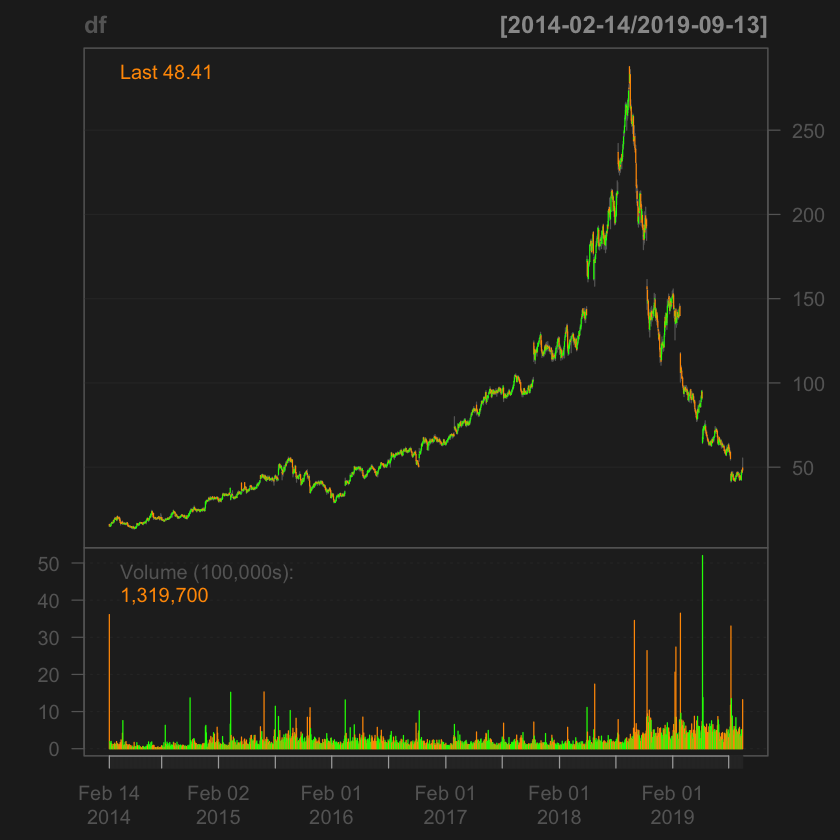

In [89]:
# explore dataset and use chartSeries to visualize the price and volume
head(df)
chartSeries(df)

In [90]:
# choose the specific time period. (In this part, I choose 2018, the nearest year and has the complete full year data)
df2 <- df["2018"]

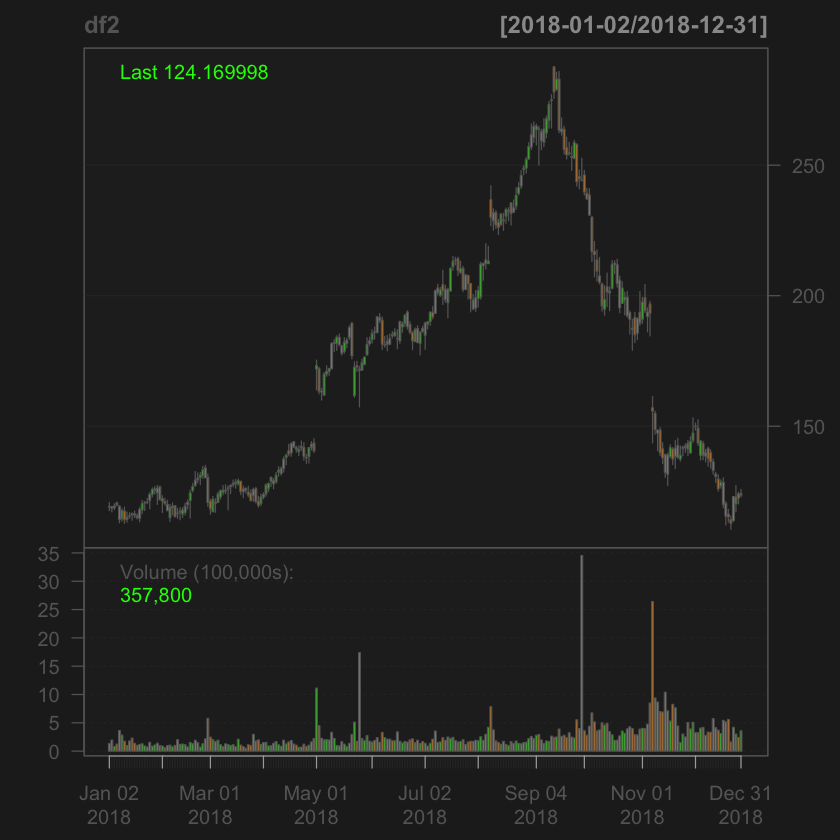

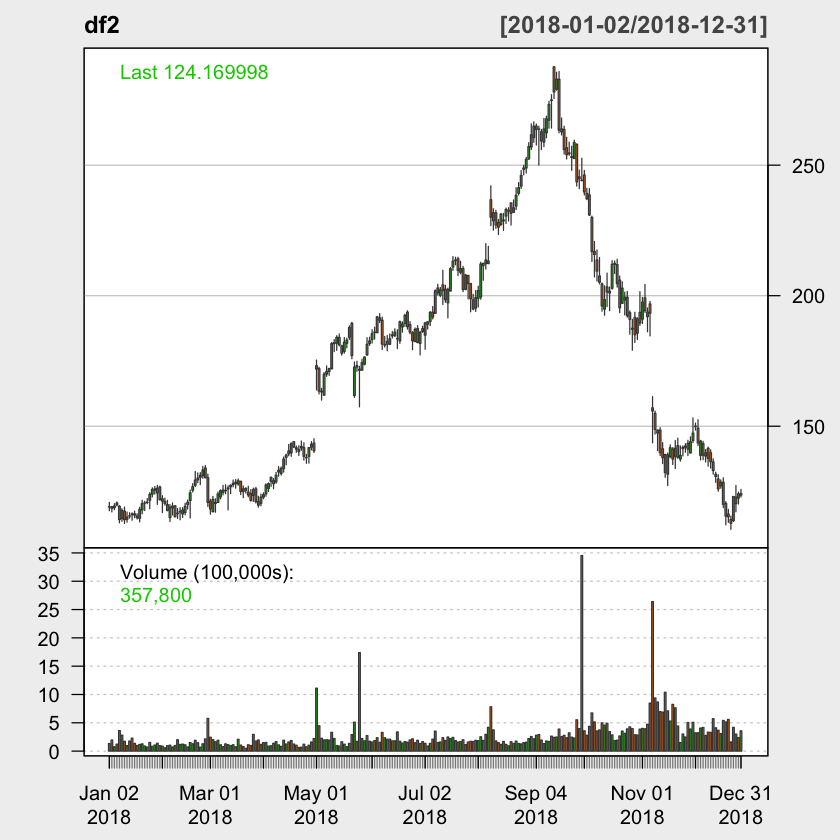

In [91]:
# visulize the stock
chartSeries(df2)
chartSeries(df2, theme = chartTheme("white"))

## 2. Price Analysis
- Lead
    - The goal in this part is to detect the unusual price movements
    - According to the range rule of thumb, most values should lie within 2 standard deviations of the mean. Based on the "68-95-99.7" rule, we can know that 95.45% corresponding to 2 standard deviations.
    (sources: https://en.wikipedia.org/wiki/68–95–99.7_rule)
- Analysis
    - Calculate the mean and standard deviation of the price
    - Examine whether the closing price falls into 2 standard deviations of the mean
- R code: Attached below:

In [119]:
# Feature 1: check to see if all prices fall into 2 standard deviation of the mean
mean <- mean(x = df2[,close.name])
sd <- sd(x = df2[,close.name])
df2$check_sd <- ifelse((df2[,close.name] <= (mean + (2*sd)) | df2[,close.name] >= (mean - (2*sd))), 0, 1)
sum(df2$check_sd)

[1] 0

- conclusion
    - As the result shown above, all prices fall into the threshold and no unusual price movements have been found in this part.

- Lead
    - The goal is to detect the unusual price movements
    - SMA (Simple Moving Average) is a forecasting technique in the TRR package
    - The closing price of INGN will be compared with the standard deviation of the mean to examine unusual price movements
- Analysis
    - SMA function applied: Calculate moving averages of a series 
    - Difference calculation: calculate the difference between the closing price and simple moving average of the past 10 periods
    - Result comparison: Sort the results to check if the price move above or below the MA significantly and then determine whether anomalies exist.
- R code: Attached below:

In [81]:
#Feature 2 - SMA with n = 10
SMA_10 <- SMA(df2[,close.name],n = 10)
df2$SMA_10_diff <- abs(SMA_10 - df2[,close.name])
df2_SMA_10 <- cbind(SMA_10, df2[,close.name], df2$SMA_10_diff)
df2_SMA_10 <- as.data.frame(df2_SMA_10)
head(df2_SMA_10[order(df2_SMA_10$SMA_10_diff,decreasing = TRUE),])

,SMA,INGN.Close,SMA_10_diff
2018-11-12,175.096,139.93,35.16601
2018-11-08,183.468,148.81,34.65800
2018-11-07,187.684,155.86,31.82400
2018-11-13,169.777,137.97,31.80700
2018-11-14,164.051,132.31,31.74100
2018-11-09,179.607,148.51,31.09700


In [96]:
#Feature 2 - SMA(simple moving average) with n = 10 (default value)
SMA_10 <- SMA(df2$INGN.Close,n = 10)
df2$SMA_10_diff <- abs(SMA_10 - df2$INGN.Close)
df2_SMA_10 <- cbind(SMA_10, df2$INGN.Close, df2$SMA_10_diff)
df2_SMA_10 <- as.data.frame(df2_SMA_10)
head(df2_SMA_10[order(df2_SMA_10$SMA_10_diff,decreasing = TRUE),])

,SMA,INGN.Close,SMA_10_diff
2018-11-12,175.096,139.93,35.16601
2018-11-08,183.468,148.81,34.65800
2018-11-07,187.684,155.86,31.82400
2018-11-13,169.777,137.97,31.80700
2018-11-14,164.051,132.31,31.74100
2018-11-09,179.607,148.51,31.09700


In [100]:
#Calculate standard deviation 
sd(x = df2$INGN.Close)

[1] 46.31179

- Conclusion
    - Compared to the standard deviation of means, the differences are all within 1 standard deviation. As a result, no unusual price movements are detected

- Lead
    - The goal is to detect the unusual price movements
    - SMA (Simple Moving Average) is a forecast technique in the TRR package
    - The closing price of INGN will be compared to examine unusual price movements
- Analysis
    - SMA function applied: Calculate moving averages of a series 
    - Difference calculation: differences between the closing price and simple moving average of the past 30 periods
    - Result comparison: Sort the results to check if the price move above or below the MA significantly and then determine whether anomalies exist.
- R code: Attached below:

In [101]:
#Feature 3 - SMA with n = 30
SMA_30 <- SMA(df2$INGN.Close, n=30)
df2$SMA_30_diff <- abs(SMA_30 - df2$INGN.Close)
df2_SMA_30 <- cbind(SMA_30, df2$INGN.Close, df2$SMA_30_diff)
df2_SMA_30 <- as.data.frame(df2_SMA_30)
head(df2_SMA_30[order(df2_SMA_30$SMA_30_diff,decreasing = TRUE),])

,SMA,INGN.Close,SMA_30_diff
2018-11-14,188.2817,132.31,55.97167
2018-11-12,194.8743,139.93,54.94434
2018-10-10,250.0153,196.10,53.91533
2018-11-13,191.5683,137.97,53.59833
2018-11-08,201.3883,148.81,52.57834
2018-11-09,198.2013,148.51,49.69134


- Conclusion
    - Compared to the standard deviation of means, the differences are all within 2 standard deviations. As a result, no unusual price movements are detected

- Lead
    - The goal is to detect the unusual price movements
    - MACD is the function in quantmod that calculates the moving average convergence divergence
        - MACD(s, nFast=12, nSlow=26,nSig=9,maType=SMA, percent = FALSE)
        - nFast is the fast moving average, nSlow is the slow moving average, nSig is the number of periods for signal moving average;
        - maType =SMA indicates we have chosen simple moving average
        - percent =FALSE implies we are calculating the difference between fast moving average and slow moving average. Setting it TRUE would return the percentage difference between the fast moving average and slow moving average.
- Analysis
    - MACD function applied: Calculate the difference between fast moving average and slow moving average
    - Difference visualization: Use chartSeries to plot
- R code: Attached below:

In [102]:
#Feature 4 - MACD
df2_MACD <- MACD(df2$INGN.Close, nFast = 12, nSlow = 26, nSig = 9, maType = SMA, percent = FALSE)
df2_MACD <- as.data.frame(df2_MACD)
head(df2_MACD[order(df2_MACD$macd,decreasing = TRUE),])

,macd,signal
2018-05-16,18.87513,13.47663
2018-05-18,17.89000,15.35733
2018-05-17,17.80231,14.44700
2018-05-21,17.58308,16.15279
2018-05-15,17.29558,12.34294
2018-09-14,17.22263,16.44081


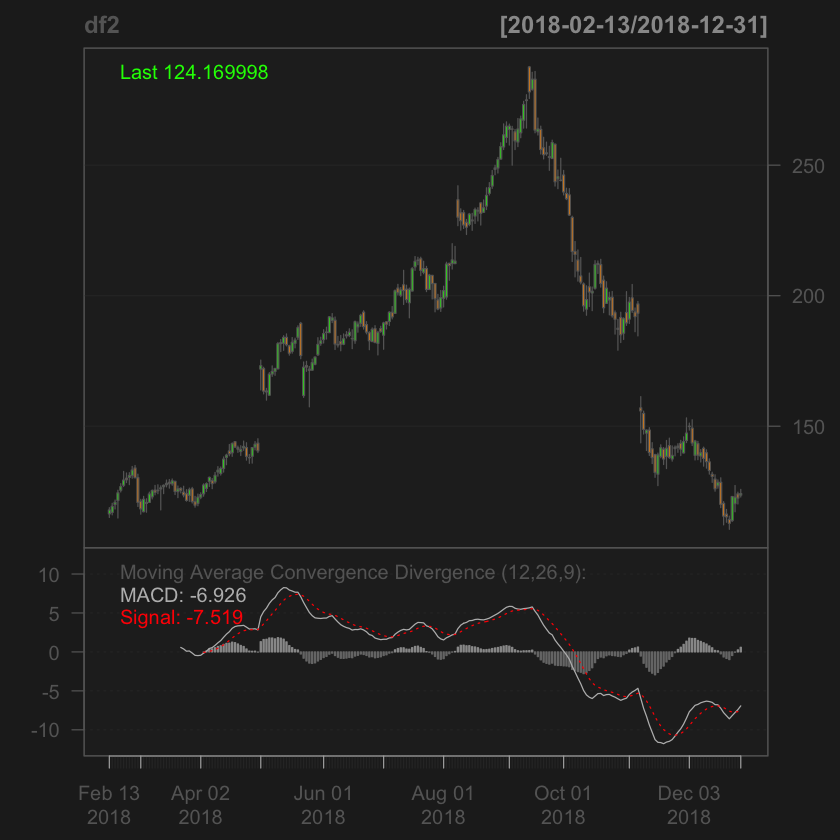

In [103]:
chartSeries(df2, TA="addMACD()")

- Conclusion
    - Compared to the standard deviation of means, the differences are all within 1 standard deviation. As a result, no unusual price movements are detected

- Lead
    - The goal is to detect the unusual price movements
    - ROC is the function in quantmod that calculates the (rate of) change of a series over n periods
- Analysis
    - Calculate the signal
    - ROC function applied and then calculate returns: Use ROC * signal
    - Plot returns and to see whether certain month has extremely high return
- R code: Attached below:

In [75]:
signal <- Lag(ifelse(df2_MACD$macd > df2_MACD$signal, 1, 0))

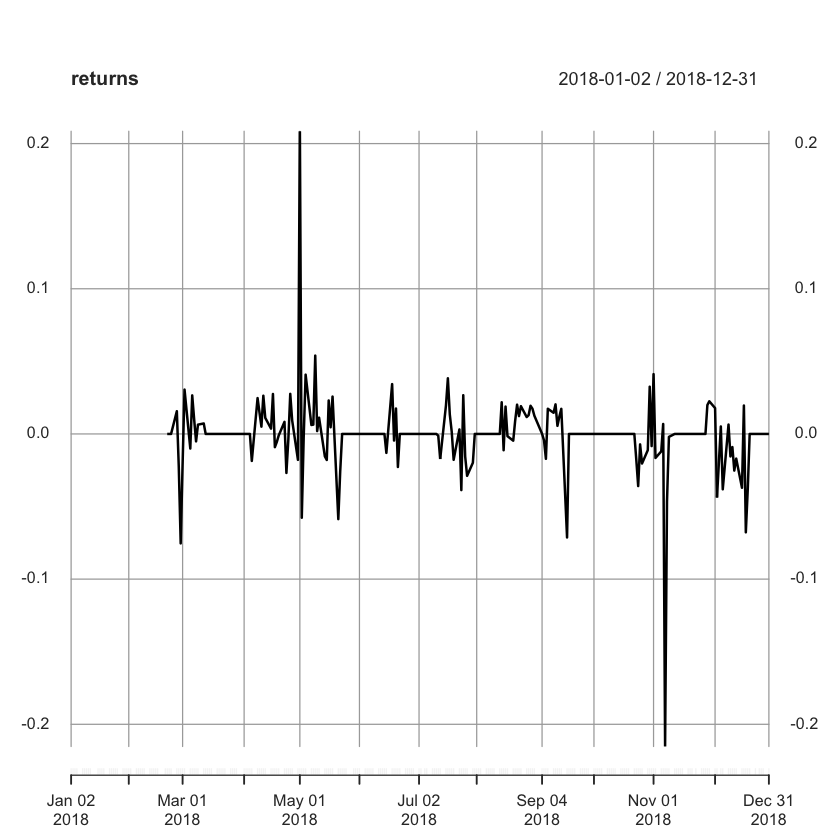

In [104]:
returns <- ROC(df2$INGN.Close)*signal
plot(returns)

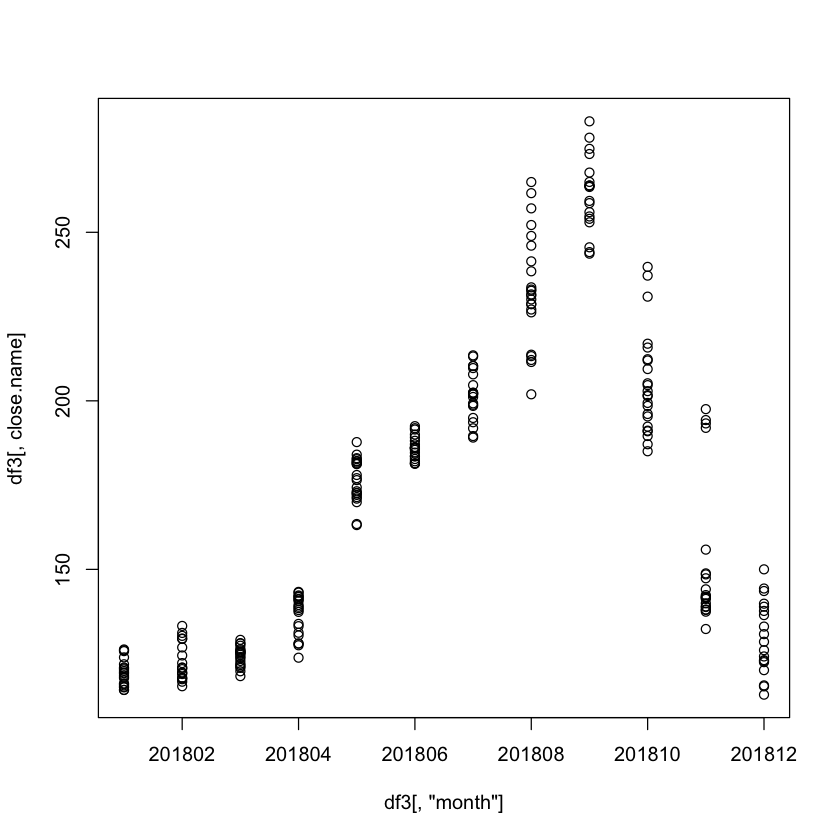

In [105]:
# Comparing with the price 
plot(df3[,close.name] ~ df3[,"month"])

- Conclusion
    - As we can see, the return in May 2018 is abnormally high while in November 2018 is abnormally low.
    - Combined with the price plot, the high return in May may be caused by the relatively low price. However, the price is not high in November and the reason for the low return in this month still need further investigation. 

## 3. Volume Analysis

- Lead
    - The goal is to detect the abnormally high trading volumes
    - Boxplot is applied to visualize volume verse month
- Analysis
    - Convert the original data to monthly data in order to split data better and then convert data to data frame
    - Visualization: Use boxplot to visualize volume data split by month and identify the abnormal values
- R code: Attached below:

In [77]:
#Feature 6 - monthly volume and boxplot
df3 <- df2 
df3$month <- format(index(df3),"%Y%m")
df3 <- as.data.frame(df3)
head(df3)

,INGN.Open,INGN.High,INGN.Low,INGN.Close,INGN.Volume,INGN.Adjusted,check_sd,SMA_10_diff,SMA_30_diff,month
2018-01-02,119.06,120.830,117.640,119.17,134000,119.17,0,NA,NA,201801
2018-01-03,119.19,119.190,117.200,118.59,195600,118.59,0,NA,NA,201801
2018-01-04,118.79,120.320,118.042,119.40,77800,119.40,0,NA,NA,201801
2018-01-05,120.57,120.995,119.470,119.85,123000,119.85,0,NA,NA,201801
2018-01-08,119.32,119.550,113.000,114.25,362900,114.25,0,NA,NA,201801
2018-01-09,114.65,118.370,113.585,117.75,282100,117.75,0,NA,NA,201801


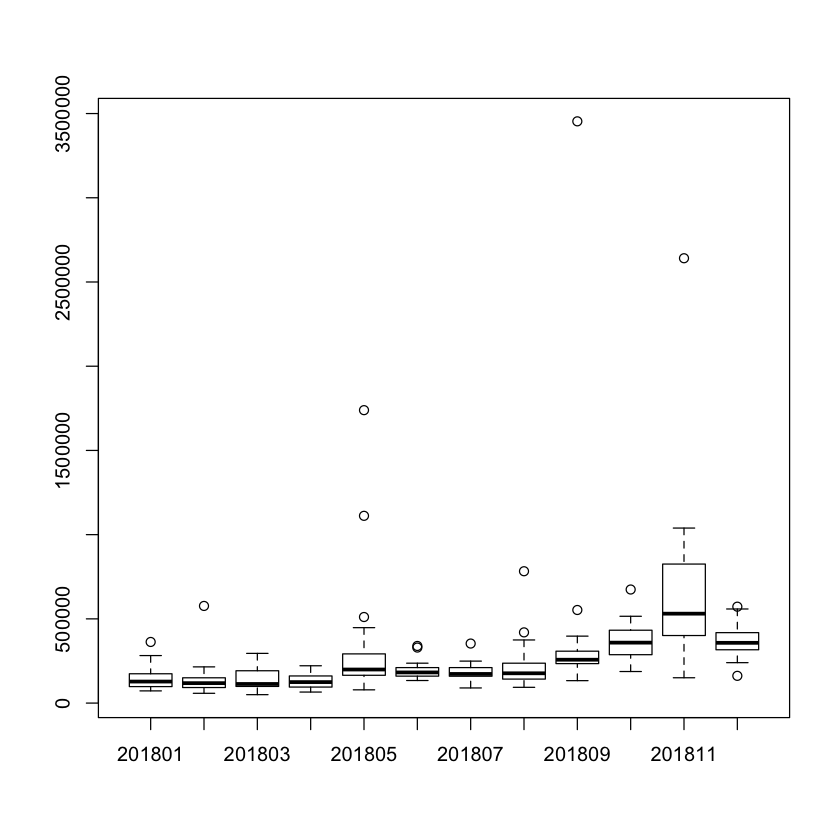

In [114]:
# A really basic boxplot
boxplot(df3$INGN.Volume ~ df3[,"month"])

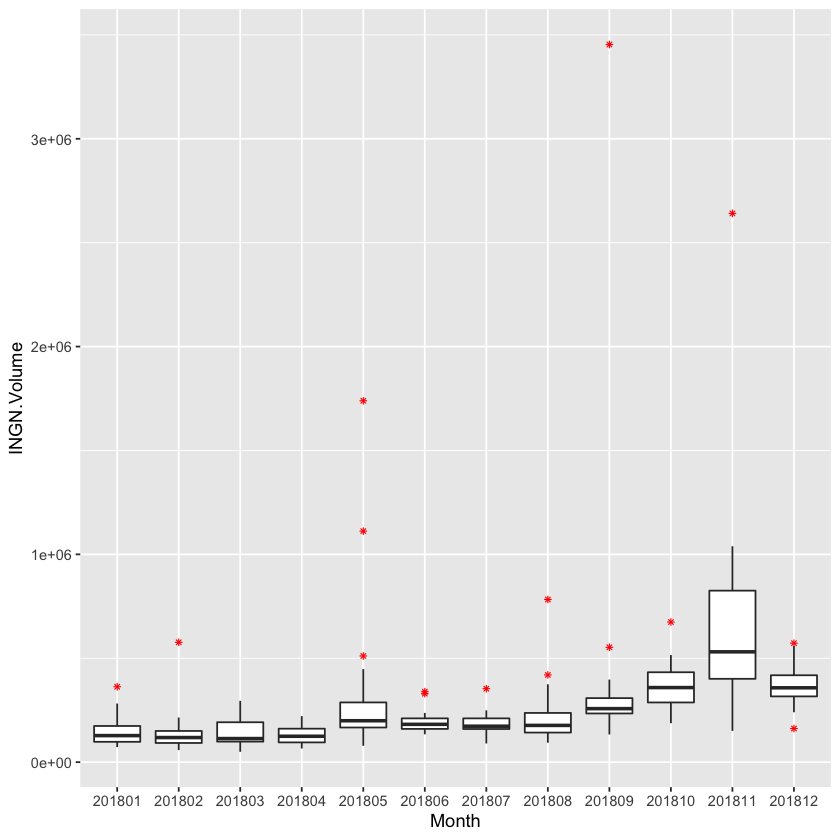

In [115]:
#using ggplot
library(ggplot2)
ggplot(df3, aes(x=as.factor(month), y=INGN.Volume))+ geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=1) + xlab("Month")

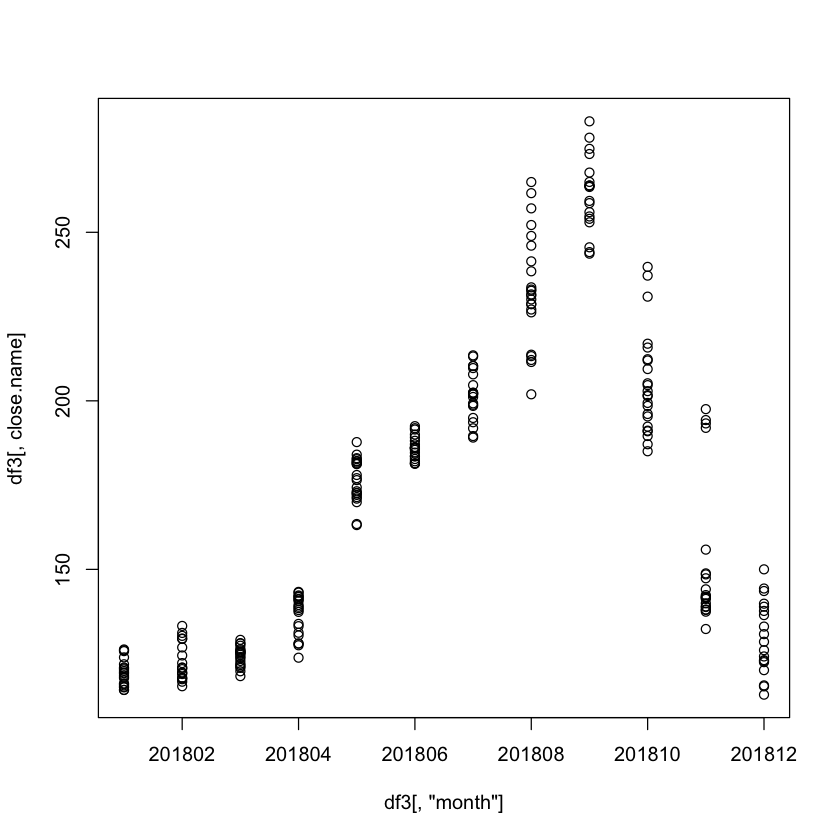

In [116]:
# Comparing with the price in 201802
plot(df3[,close.name] ~ df3[,"month"])

- Conclusion
    - As we can see, the outlier existed in Sep. 2018. Based on the readings, one of the symptoms of anomalies is abnormally high trading volume and need further investigation. Traced back to the price in 2018, I found the price is extremely high in September. As a result, the relatively high price may be the reason why trading volume is abnormally high.